In [1]:
import random
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# 0. Background

### Maybe one could say, somewhat colloquially, that ...

... _probability theory_ is the field of study involving math on relative frequencies, and that...

... a _probability_ is a measure, lying between 0 and 1, that reflects the _expectation_ of a event in terms of how frequently it will happen.

# 1. Basic Probability

### Get some marbles

In [3]:
marble_colors = ["black", "white"]

In [4]:
print(random.randint.__doc__)

Return random integer in range [a, b], including both end points.
        


[0, 1] -> between 0 and 1, including both boundaries

(0, 1) -> between 0 and 1, excluding both boundaries

(0, 1] -> between 0 and 1, excluding 0 but including 1

In [5]:
marble_bag = [marble_colors[random.randint(0, 1)] for i in range(100)]

In [6]:
marble_bag[:10]

['black',
 'black',
 'white',
 'black',
 'white',
 'white',
 'black',
 'black',
 'white',
 'black']

In [7]:
Counter(marble_bag)

Counter({'black': 47, 'white': 53})

### What are the chances ...
... that we pull a white marble from our bag?

--

We look at the number of _white_ marbles in the bag compared to the _total_ number of marbles in the bag, and take the ratio of _white_ to _total_.

In [8]:
cnt_marbles_in_bag = Counter(marble_bag)

In [9]:
cnt_marbles_in_bag

Counter({'black': 47, 'white': 53})

In [10]:
num_white_marbles = cnt_marbles_in_bag['white']

In [11]:
num_white_marbles / len(marble_bag)

0.53

Now, let's try to verify our solution. We can do this by randomly drawing 10 marbles from `marble_bag` and comparing the proportion of these marbles that are _white_ to what we just calculated above:

In [12]:
draws_10 = [marble_bag[random.randint(0, 99)] for i in range(10)]

In [13]:
Counter(draws_10)

Counter({'white': 6, 'black': 4})

So, pretty close! But not exact... any ideas on how we might be able to get close to our expected frequency?

--

If you were thinking "draw more marbles," you're right! Let's try it: 

In [14]:
draws_10 = [marble_bag[random.randint(0, 99)] for i in range(10)]
cnt_10 = Counter(draws_10)['white'] / 10 * 100

draws_100 = [marble_bag[random.randint(0, 99)] for i in range(100)]
cnt_100 = Counter(draws_100)['white'] / 100 * 100

draws_1000 = [marble_bag[random.randint(0, 99)] for i in range(1000)]
cnt_1000 = Counter(draws_1000)['white'] / 1000 * 100

draws_10000 = [marble_bag[random.randint(0, 99)] for i in range(10000)]
cnt_10000 = Counter(draws_10000)['white'] / 10000 * 100

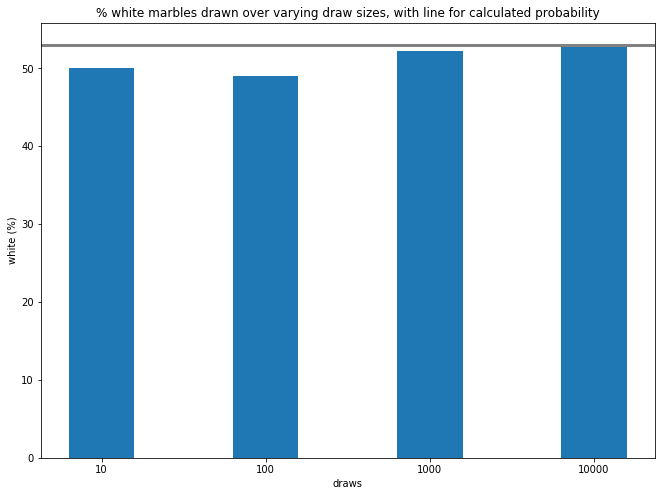

In [15]:
fig = plt.figure(figsize=(11, 8))

draws = ["10", "100", "1000", "10000"]
white_counts = [cnt_10, cnt_100, cnt_1000, cnt_10000]
bar = plt.bar(x=draws, height=white_counts, width=.4)

line = plt.axhline(y=num_white_marbles / len(marble_bag) * 100, color="grey", linewidth=3)

xlab = plt.xlabel("draws")
ylab = plt.ylabel("white (%)")
title = plt.title("% white marbles drawn over varying draw sizes, with line for calculated probability")

We are seeing here the conseuqences of the _law of large numbers_, which theorizes that: 
- "...the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed..."

See more on [Wikipedia](https://en.wikipedia.org/wiki/Law_of_large_numbers).

### How about for ...
... pulling first a white marble and then, after replacing the white marble, a black marble?

--

A nice method for attacking this sort of problem is to start by breaking the draws up into separate events that we can link back up later:
1. The first thing we need to do is what we did above: pull a _white_ marble from the bag, an event whose probability of occuring we already understand.
2. Next, we think about the chances of drawing a _black_ marble, for which we can follow the exact same protocol that we did for drawing a _white_ marble

In [16]:
p_white_marble = num_white_marbles / len(marble_bag)

In [17]:
p_white_marble

0.53

In [18]:
num_black_marbles = cnt_marbles_in_bag['black']

In [19]:
p_black_marble = num_black_marbles / len(marble_bag)

In [20]:
p_black_marble

0.47

So, how do we now aggregate these two probabilities correctly? 

You could almost look at the first event as a _barrier to entry_ to being able to make the second happen, if that makes sense. In other words, you can't draw _a white and then a black marble_ without first drawing the _white_ marble.

So the probability of you getting to even try to draw a black marble is equal to the probability of drawing that first white marble. This means that out of _all_ (100%) of events, you have a `p_white_marble` chance of being able to try for the black marble, and then out of that portion of possibilities, a `p_black_marble` chance of drawing black. Therefore:

In [21]:
p_white_then_black = p_white_marble * p_black_marble

In [22]:
p_white_then_black

0.2491

This an example of a _conditional_ probability: draw a black marble _conditional on_ or _given that_ you've first drawn a white marble.

Note that we can take a simple product of these two probabilities due to the fact that the first and second draws are _independent_. Since we are replacing the marble after the first draw, we are not affecting the outcome of the second draw with our first - the only thing we are doing with our first draw is deciding whether or not we get a second draw.

Handling _dependent conditional probabilities_ requries some modifications to the above methodology.

### Let's do one more....

How about the probability of pulling first a white marble, replacing it, drawing a black marble, _not_ replacing it, and then drawing another black marble?

--

Following a similar methodology to before, we start with `p_white_then_black` as our _gateway_ to the possibility of making our third draw. We will then have to scale this final set of events down by the the chances of our third draw going the way we want it to.

EXCEPT there is a small but important difference here - we have to alter our marble bag after the second draw...

In [67]:
marble_bag.remove('black')

In [68]:
len(marble_bag)

99

In [69]:
cnt_marbles_in_bag = Counter(marble_bag)

In [70]:
num_black_marbles = cnt_marbles_in_bag['black']

In [71]:
p_black_marble = num_black_marbles / len(marble_bag)

In [72]:
p_white_then_black * p_black_marble

0.11574343434343434

# 2. Expected Value

### Average: the Arithmetic Mean

Let's say we have the following grades for our math class so far:

In [23]:
math_grades = [100, 85, 95, 90]

How would we take the average?

--

Taking the _average_, or a specific number that represents the _central tendency_ of these grades, would involve us summing these grades and then dividing that sum by the number of grades that went into it. Put another way, we take everything we have, make all that into one combined thing, and then divide that thing up into equal parts, with that number of parts equaling the original number of things we had.

This measure can prove useful for explaining data, particularly for aggregating lots of information into a single measure. There are other measures of central tendency, too, like the _median_, that we'll get into at later points in time. There are other types of _mean_ calculations, too, but when people say _average_ they are referring to the _arithmetic mean_, which we have described above.

A simple function to calculate average:

In [24]:
def average(numbers):
    total = sum(numbers)
    count = len(numbers)
    return total / count

In [25]:
average(math_grades)

92.5

A basic, iterative approach could be taken, as well:

In [26]:
def average_iterative(numbers):
    total = 0
    count = 0
    
    for num in numbers:
        total += num
        count += 1
    
    return total * (1 / count)

In [27]:
average_iterative(math_grades)

92.5

Note that `for` operates similarly to the `while` loop syntax we encountered last week, except that it takes care of more of the work for you - all you have to do with a `for` loop is tell it what to loop over, and what to do each time you loop.

Let's visualize what we've calculated:

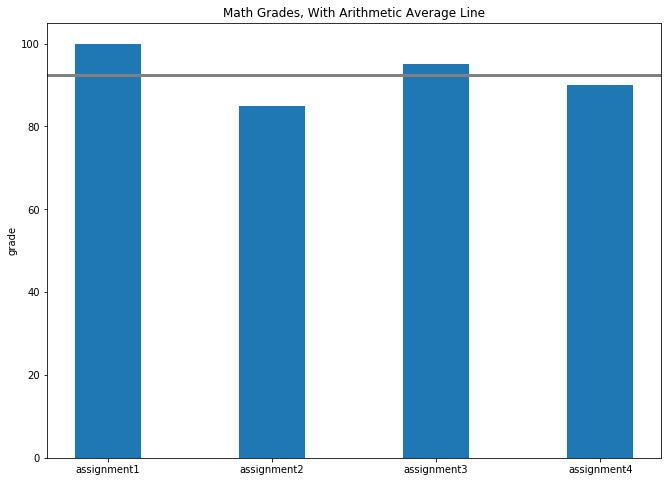

In [28]:
fig = plt.figure(figsize=(11, 8))

x = [0, 1, 2, 3]
x_labels = ["assignment1", "assignment2", "assignment3", "assignment4"]
bar = plt.bar(x=x, height=math_grades, width=.4, tick_label=x_labels)

line = plt.axhline(y=average(math_grades), color="grey", linewidth=3)

ylab = plt.ylabel("grade")
title = plt.title("Math Grades, With Arithmetic Average Line")

We can see that some assignments come in above our _average_, and some below it, but they're all generally in the neighborhood (note that this last observation is not guaranteed when dealing with _averages_).

### The Weighted Average

Let's say we have the following `(grades, grade_weight)` pairs for our math class, whose assignments comprised of two quizzes and two exams:

In [29]:
math_weighted_grades = [(100, .1), (85, .4), (95, .1), (90, .4)]

We can spot the tests right away, as they have a weight of 40%, as opposed to 10% for each of the quizzes. How can we take an average of these grades that accounts for the fact that tests are so much more important? 

--

In [30]:
def average_weighted_iterative(grade_weight_pairs):
    total = 0
    
    for grade, weight in grade_weight_pairs:
        total += grade * weight
    
    return total

In [31]:
average_weighted_iterative(math_weighted_grades)

89.5

In [32]:
math_grade_weights = list(zip(*math_weighted_grades))[1]

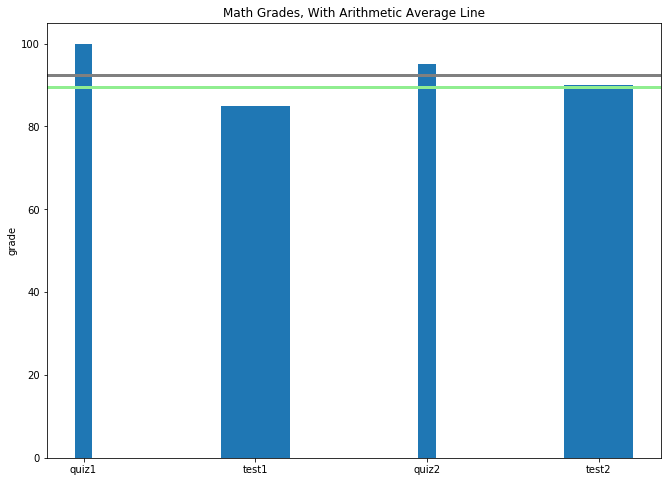

In [33]:
fig = plt.figure(figsize=(11, 8))

x = [0, 1, 2, 3]
xlabels = ["quiz1", "test1", "quiz2", "test2"]
bar = plt.bar(x=x, height=math_grades, width=math_grade_weights, tick_label=xlabels)

line1 = plt.axhline(y=average(math_grades), color="grey", linewidth=3)
line2 = plt.axhline(y=average_weighted_iterative(math_weighted_grades), color="lightgreen", linewidth=3)

ylab = plt.ylabel("grade")
title = plt.title("Math Grades, With Arithmetic Average Line")

### Real World Examples: Financial instruments

Let's say I own a portfolio of stocks, and I want to represent the performance of this portfolio in a single number so that I can make fun of my friend (whose stocks aren't performing well) and also try to out-maneuver her from an office politics perspective so that I get a bigger bonus. And let's say that I have earned the following return figures over the period that I've held the stocks (one figure for each stock):

In [34]:
stock_returns = [.05, .075, .025, -.05, .12, -.01]

Well, we could take an average, right?

In [35]:
average(stock_returns)

0.034999999999999996

But what does this number tell us? If you know anything about stocks, you'll know that a return is a _relative_ measure; i.e. it's provided in units of _percent_ so that you can apply this to measure to the size of your position to get what you've actually made in dollars.

Put another way, without our position sizes we don't really know how well our portfolio has performed. Let's introduce some position sizes (these are relative sizes within the portfolio):

In [36]:
stock_position_sizes = [.1, .05, .1, .50, .05, .20]

Now that we have these, it may seem obvious that we need to take some kind of a weighted average - but what are we averaging, and what are weighting that average by?

--

If you guessed that we're averaging returns and weighting by position sizes - you're right! Let's combine these measures so that we can pass them into our previous function:

In [37]:
stock_return_position_pairs = list(zip(stock_returns, stock_position_sizes))

In [48]:
stock_return_position_pairs[0]

(0.05, 0.1)

In [39]:
average_weighted_iterative(stock_return_position_pairs)

-0.00975

So, not quite as good, eh? Let's hope our friend did even worse!

Let's say we've decided stock picking is too hard and that we're not going to move forward with continuing to trade in the equities markets. Somehow, our genius-of-a-manager thinks that we still have talent and hasn't fired us yet, and so we're trying to think of something else to do. 

A buddy tells us about lending - we essentially rent someone money, so long as we're OK with parting ways with our capital now, they'll give us _more_ back later (what we originally lent them plus some _interest_ to account for us doing the favor of not being able to utilize our funds for a while). Great!

So we decide to go ahead and buy they following loans:

In [42]:
loan_principal = [100, 75, 50, 250, 25, 50]

In [43]:
loan_interest = [.05, .075, .025, .025, .10, .15]

Since _interest_, like _return_ is a relative measure, we need to multiply interest by _principal_ (the amount we're lending) to understand how much money we're going to make.

First, we'll create a list of `(interest, principal)` pairs, and then we'll create a new list that consists of the product across each pair.

In [45]:
loan_interest_principal_pairs = list(zip(loan_interest, loan_principal))

In [47]:
loan_interest_principal_pairs[0]

(0.05, 100)

In [49]:
loan_interest_dollars = [pair[0] * pair[1] for pair in loan_interest_principal_pairs]

Now we can sum across all the dollar-interest values to get a measure of total profit for the portfolio:

In [51]:
sum(loan_interest_dollars)

28.125

And, finally, we can divide this by the total principal of the portfolio to get a sense of our _relative_ profit (or return):

In [52]:
sum(loan_principal)

550

In [53]:
sum(loan_interest_dollars) / sum(loan_principal)

0.05113636363636364

Nice! So we're going to a make 5+% return just because we have some cash lying around? Great! 

Except.... what are we forgetting here?

--

We might not get paid back! What?! Yes, believe it or not, this is a part of lending, and interest rates are in fact generally calculated based on how likely someone is to pay back a loan. The higher the risk of default (non-payment), the higher the interest rate.

So we can do some math to back out the default rates implied by the interest rates on these loans, but we want some more nuanced insight into where the markets are going, and we head over to our quant department to get their thoughts. They come back to us with the following default probabilities corresponding to our loan portfolio:

In [55]:
loan_default_probabilities = [.07, .05, .01, .08, .10, .18]

How do we create a more accurate sense of what our _expected_ profit for each loan is, using the above default probabilities?

--

We can take a _probability-weighted average_, otherwise known as _**expected value**_, of the dollar-interest amounts for the loans in the portfolio:

In [58]:
loan_repayment_probabilities = [1 - p for p in loan_default_probabilities]

In [59]:
loan_interest_probability_pairs = list(zip(loan_interest_dollars, loan_repayment_probabilities))

In [60]:
average_weighted_iterative(loan_interest_probability_pairs)

25.38125

In [61]:
25.38125 / sum(loan_principal)

0.04614772727272728

Ok, so still in the ballpark, but definitely a little lower than before.

Also, if we were going to make decisions around which of these loans were worthwhile investments or not, we might start by comparing whose expected default rate was greater than the rate we'd be paid for holding the loan, and vice-versa!